In [2752]:
import copy
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

In [2769]:
np.mean([2.0, 1.7883211678832116, 1.5549738219895288, 1.3909287257019438, 1.3510436432637571])

np.float64(1.6170534717676883)

In [2753]:
def draw_plot(run_arr, mean):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(mean,color="red",linestyle="--",label=f"Avg: {mean}")
    plt.xlabel("Iterations with 3,7,11,15,19 edges respectively")
    plt.ylabel("Proportion of 100 graphs that have a cycle")
    plt.title("Proportion of 100 graphs that have a cycle over increasing numbers of edges") #all labels have been changed when running separately with different experiments to produce appropriate graphs
    plt.show()

In [2754]:
def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

In [2755]:
class GraphII:
    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])
        
    def has_edge(self, src, dst):
        return src in self.graph[dst]
    
    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            if src != dst: #slight modification to correct self loops, which are already technically allowed
                self.graph[dst].append(src)
    
    def get_graph(self,):
        return self.graph
    
    def has_cycle(self,):
        # your implementation for Part 3 goes here
        seen = set()
        
        #inner function for not connected graphs
        def dfs_rec(current, prev): #recursive dfs uses function call stack, makes tracking where we came from easy
            seen.add(current)
            
            for next in self.graph[current]:
                if next in seen and next != prev:
                    return True
                elif next not in seen:
                    if dfs_rec(next, current): #has to be in if statement because if False, check other branches, don't return yet
                        return True
            return False
        
        for node in range(len(self.graph)):
            if node not in seen:
                if dfs_rec(node, None):
                    return True
        
        return False #every node of every component is checked
    
    def is_connected(self,node1,node2):
        # your implementation for Part 3 goes here
        #this is DFS_2 with src replaced by node1, dst replaced by node2, and return path by return True
        stack = [node1]
        seen = set()
        
        while len(stack) > 0:
            node = stack.pop()
            if node not in seen:
                seen.add(node)
                if node == node2: 
                    return True
                for neighbor in self.graph[node]:
                    stack.append(neighbor)
        
        return False #traversed through the whole component and didn't return True 


In [2756]:
def create_random_graph(nodes, edges):
    # your implementation for Part 4 goes here
    graph = GraphII(nodes)
    
    for _ in range(edges):
        src = random.randint(0, nodes-1)
        dst = random.randint(0, nodes-1)
        while graph.has_edge(src, dst): #making sure edges amount of edges are actually added
            src = random.randint(0, nodes-1)
            dst = random.randint(0, nodes-1)
            
        graph.add_edge(src, dst)
    
    return graph

In [2757]:
def is_vertex_cover(G, C): #modified for GraphII implementation
    graph = G.get_graph()
    for start in range(len(graph)):
        for end in graph[start]:
            if not(start in C or end in C):
                return False
    return True

In [2758]:
def mvc_2(G):
    # Your implementation for part 6.b goes here
    min_cover=[]
    graph = G.get_graph() #copy not needed because graph not modified
    
    remaining_vertices = [i for i in range(len(graph))]
    random.shuffle(remaining_vertices)
    #now pop() can be used to select a random node not already in C
    
    while not is_vertex_cover(G, set(min_cover)): #set() bc membership is much faster
        v = remaining_vertices.pop()
        min_cover.append(v) #add to min cover
    
    return min_cover

In [2759]:
def mvc_3(G):
    # Your implementation for part 6.c goes here
    min_cover = []
    og = G.get_graph()
    cgraph = copy.deepcopy(og)#inner arrays need deepcopy
    
    remaining_starts = [i for i in range(len(cgraph))]
    random.shuffle(remaining_starts)
    #now pop() can be used to select a random node not already in C
    
    while not is_vertex_cover(G, min_cover): #set() bc membership is much faster
        u = remaining_starts.pop()
        while len(cgraph[u]) == 0: #just a check in place in case this isn't an edge, so it doesn't error
            u = remaining_starts.pop() #if previous one's an isolated node, move on
        
        randex = random.randint(0,len(cgraph[u])-1) #random index for v to create random edge (u,v)
        v = cgraph[u][randex]
        
        #add to min cover
        min_cover.append(v) 
        min_cover.append(u)
        
        #remove all incident edges for v
        l = cgraph[v].copy() #in case we have to remove a self-loop, don't want to skip an iteration
        for neighbor in l:
            cgraph[neighbor].remove(v)
        cgraph[v] = []

        #remove all incident edges for u (identical, v swapped for u)
        l = cgraph[u].copy() #in case we have to remove a self-loop, don't want to skip an iteration
        for neighbor in l:
            cgraph[neighbor].remove(u)
        cgraph[u] = []
    
    return min_cover

In [2760]:
def mvc_1(G):
    # Your implementation for part 6.a goes here
    min_cover=[]
    og = G.get_graph()
    cgraph = copy.deepcopy(og)#inner arrays need deepcopy
    
    while not is_vertex_cover(G, set(min_cover)): #set() bc membership is much faster
        #finding highest degree
        v = 0
        degree = 0
        for node in range(len(cgraph)):
            if len(cgraph[node]) > degree:
                degree = len(cgraph[node])
                v = node
        #add to min cover
        min_cover.append(v)
        #remove all incident edges
        l = cgraph[v].copy() #in case we have to remove a self-loop, don't want to skip an iteration
        for neighbor in l:
            cgraph[neighbor].remove(v)
        cgraph[v] = []
    
    return min_cover

In [2761]:
def MVC(G): #modified for GraphII implementation
    graph = G.get_graph()
    nodes = [i for i in range(len(graph))]
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover

MVC(G)

[4, 3, 2, 1, 0]

In [2762]:
#Expected values:
def draw_plot1(run_arr1, run_arr2, run_arr3):
    x = np.arange(0, len(run_arr1),1)
    fig=plt.figure(figsize=(20,8))
    #plt.bar(x,run_arr)
    plt.plot(x, run_arr1, label="mvc_1()")
    plt.plot(x, run_arr2, label="mvc_2()")
    plt.plot(x, run_arr3, label="mvc_3()")
    #plt.axhline(mean,color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations of 100 graphs with 1,5,10,15,20 edges respectively")
    plt.ylabel("Sum of lengths of MVCs returned by mvc_1/2/3() divided by MVC()'s lengths' sum")
    plt.title("Expected performances of mvc_1/2/3() over 6 nodes and edge numbers 1,5,10,15,20")
    plt.legend()
    plt.show()

In [2763]:
#Averages:
def draw_plot2(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    #plt.plot(x, run_arr, label="label")
    #plt.axhline(mean,color="red",linestyle="--",label="Avg")
    plt.xlabel("mvc_1(), mvc_2(), and mvc_3() respectively")
    plt.ylabel("Average expected performance")
    plt.title("A comparison of mvc_1/2/3()'s average expected performances")
    #plt.legend()
    plt.show()

In [2764]:
#hit rates:
def draw_plot3(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    #plt.plot(x, run_arr, label="label")
    #plt.axhline(mean,color="red",linestyle="--",label="Avg")
    plt.xlabel("mvc_1(), mvc_2(), and mvc_3() respectively")
    plt.ylabel("Sum of occurrences of minimal MVCs in total, divided by 500")
    plt.title("A comparison of mvc_1/2/3()'s number of successfully minimal vertex covers, out of 500 trials")
    #plt.legend()
    plt.show()

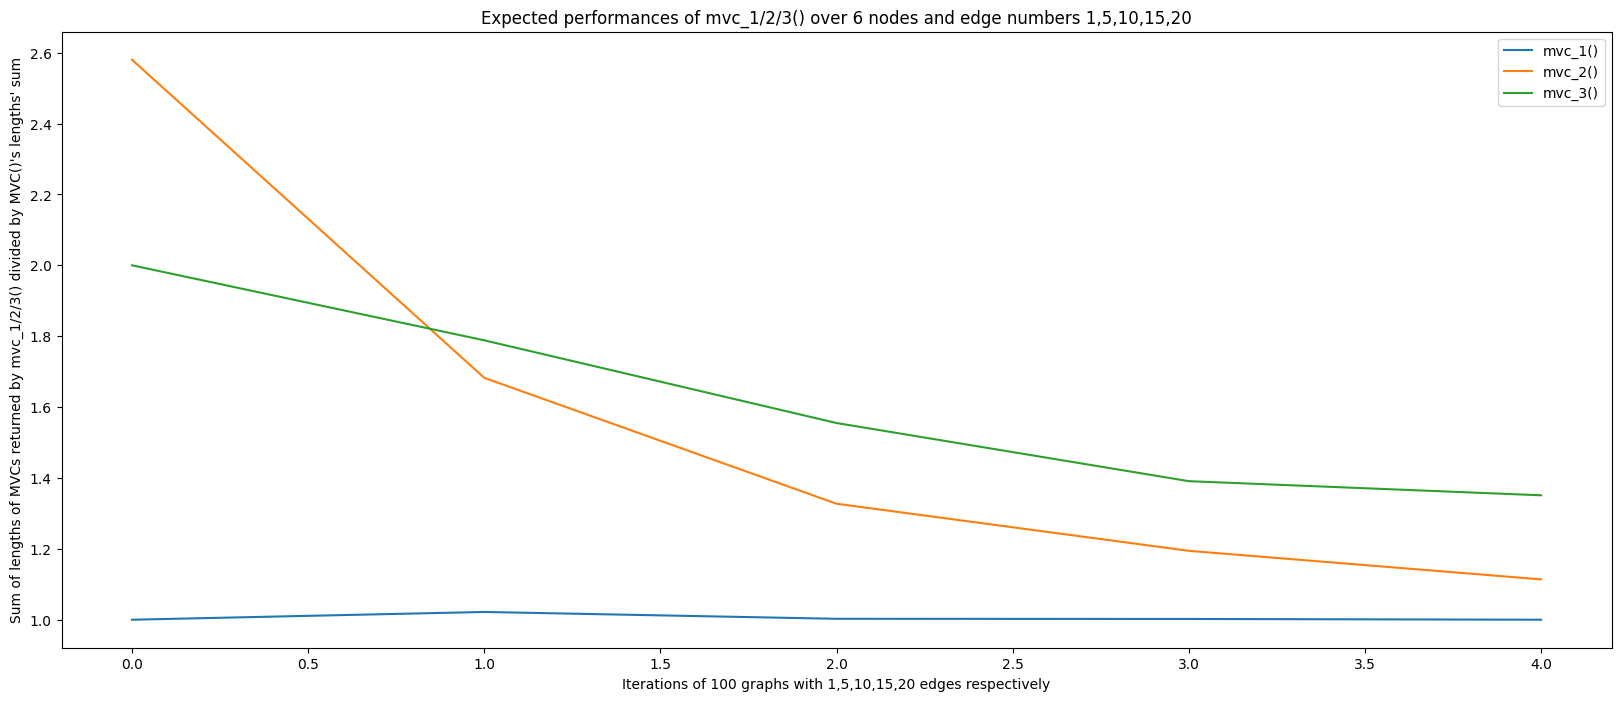

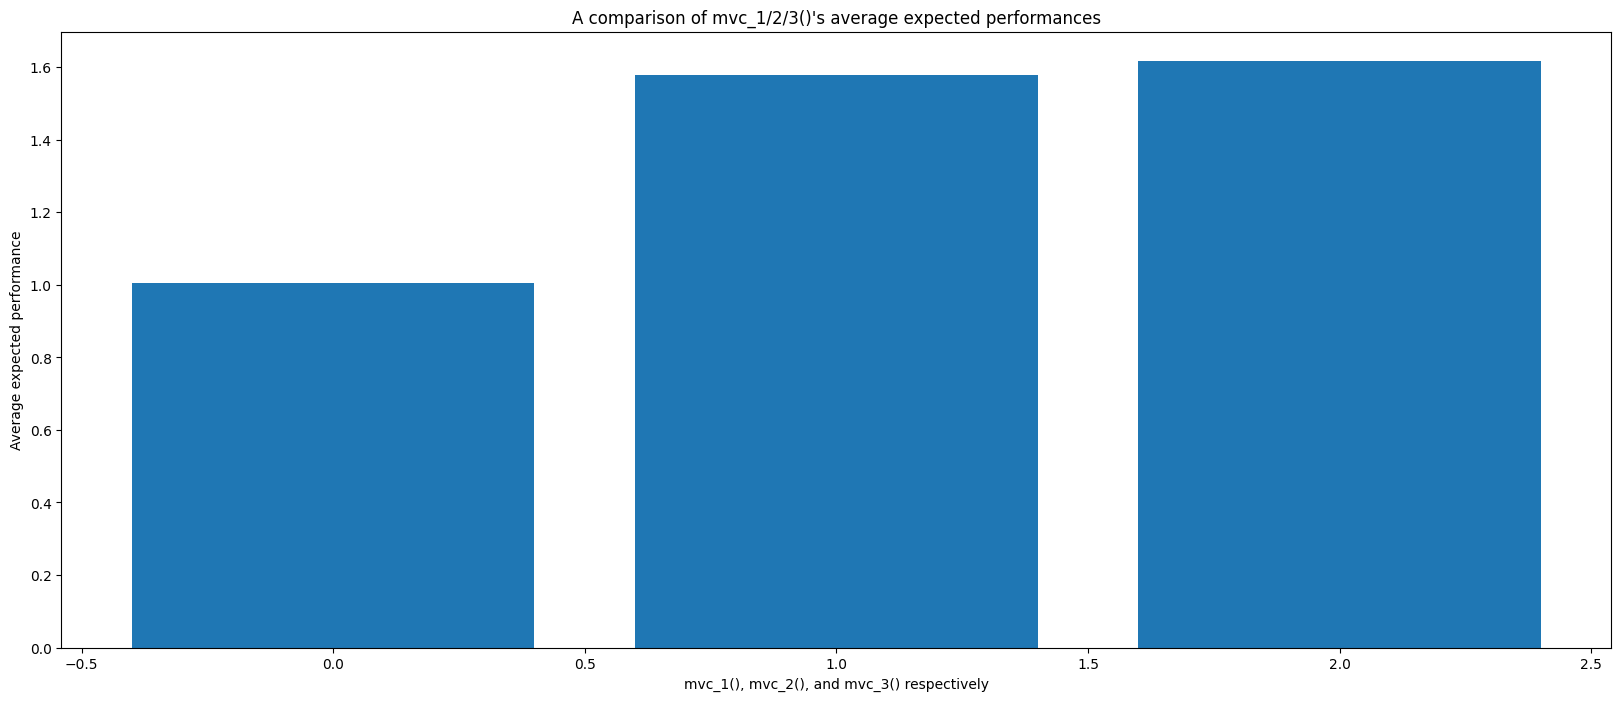

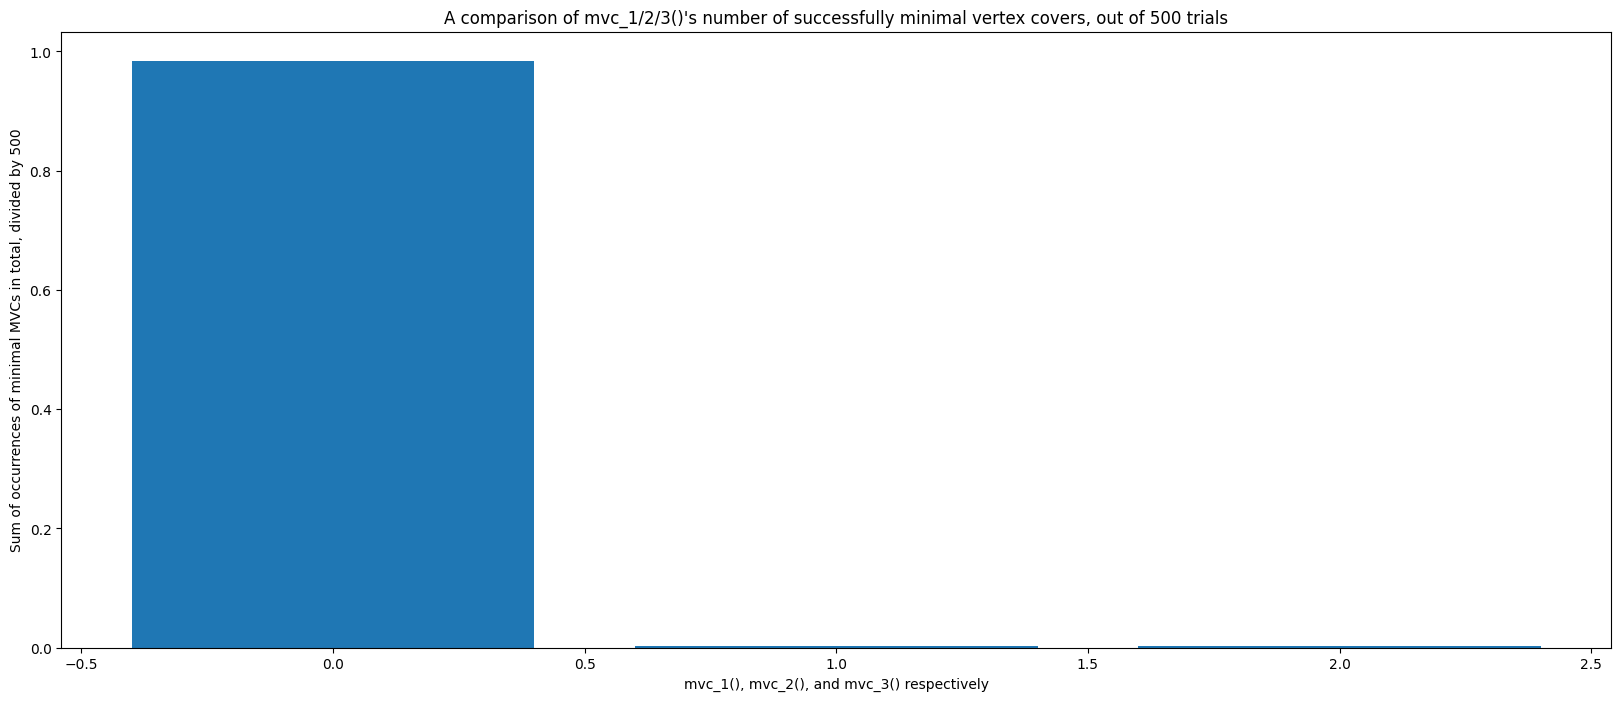

[1.0, 1.0218978102189782, 1.0026178010471205, 1.0021598272138228, 1.0] [2.58, 1.6824817518248176, 1.3272251308900525, 1.1943844492440605, 1.113851992409867] [2.0, 1.7883211678832116, 1.5549738219895288, 1.3909287257019438, 1.3510436432637571]


True

In [2765]:
def experiment_2():
    # your implementation for experiment in part 7 goes here
    edges = [1,5,10,15,20] 
    
    MVCsumArray = [] #array for sums of different edge numbers
    M1sumArray = []
    M2sumArray = []
    M3sumArray = []
    
    #extra data for another graph
    hitRates = [0,0,0] #how many times each algo is right (out of 500)
    #extra data for another graph
    
    for e in edges: #500 graphs in total
        Graphs = [] #so that algorithms are tested on the same set of random graphs
        for _ in range(100):
            Graphs.append(create_random_graph(6, e))
            
        MVCsum = 0
        M1sum = 0
        M2sum = 0
        M3sum = 0
        for G in Graphs: #collecting the sums for all 100 random graphs
            #summing mvc lengths every 100 graphs
            min_cover0 = MVC(G)
            MVCsum += len(min_cover0)
            min_cover1 = mvc_1(G)
            M1sum += len(min_cover1)
            min_cover2 = mvc_2(G)
            M2sum += len(min_cover2)
            min_cover3 = mvc_3(G)
            M3sum += len(min_cover3)
            #counting every single time an algo produced a MINIMUM vertex cover
            if len(min_cover0) == len(min_cover1):
                hitRates[0] += 1
            elif len(min_cover0) == len(min_cover2):
                hitRates[1] += 1
            elif len(min_cover0) == len(min_cover3):
                hitRates[2] += 1
        #collecting results for the 5 different edge numbers
        MVCsumArray.append(MVCsum)
        M1sumArray.append(M1sum)
        M2sumArray.append(M2sum)
        M3sumArray.append(M3sum)
    #overall success rate
    hitRates[0] = hitRates[0]/500
    hitRates[1] = hitRates[1]/500
    hitRates[2] = hitRates[2]/500
    
    
    #Processing data into graphs:
    
    #Expected values:
    m1_run = []
    m2_run = []
    m3_run = []
    for i in range(5):
        m1_run.append(M1sumArray[i]/MVCsumArray[i])
        m2_run.append(M2sumArray[i]/MVCsumArray[i])
        m3_run.append(M3sumArray[i]/MVCsumArray[i])
    draw_plot1(m1_run, m2_run, m3_run)
    
    #Averages:
    averages = []
    averages.append(np.mean(m1_run)) #mvc_1()'s average expected performance
    averages.append(np.mean(m2_run)) #mvc_2()'s average expected performance
    averages.append(np.mean(m3_run)) #mvc_3()'s average expected performance
    draw_plot2(averages)
    
    #hit rates:
    draw_plot3(hitRates)
    
    print(m1_run,m2_run,m3_run)
    
    return True

experiment_2()

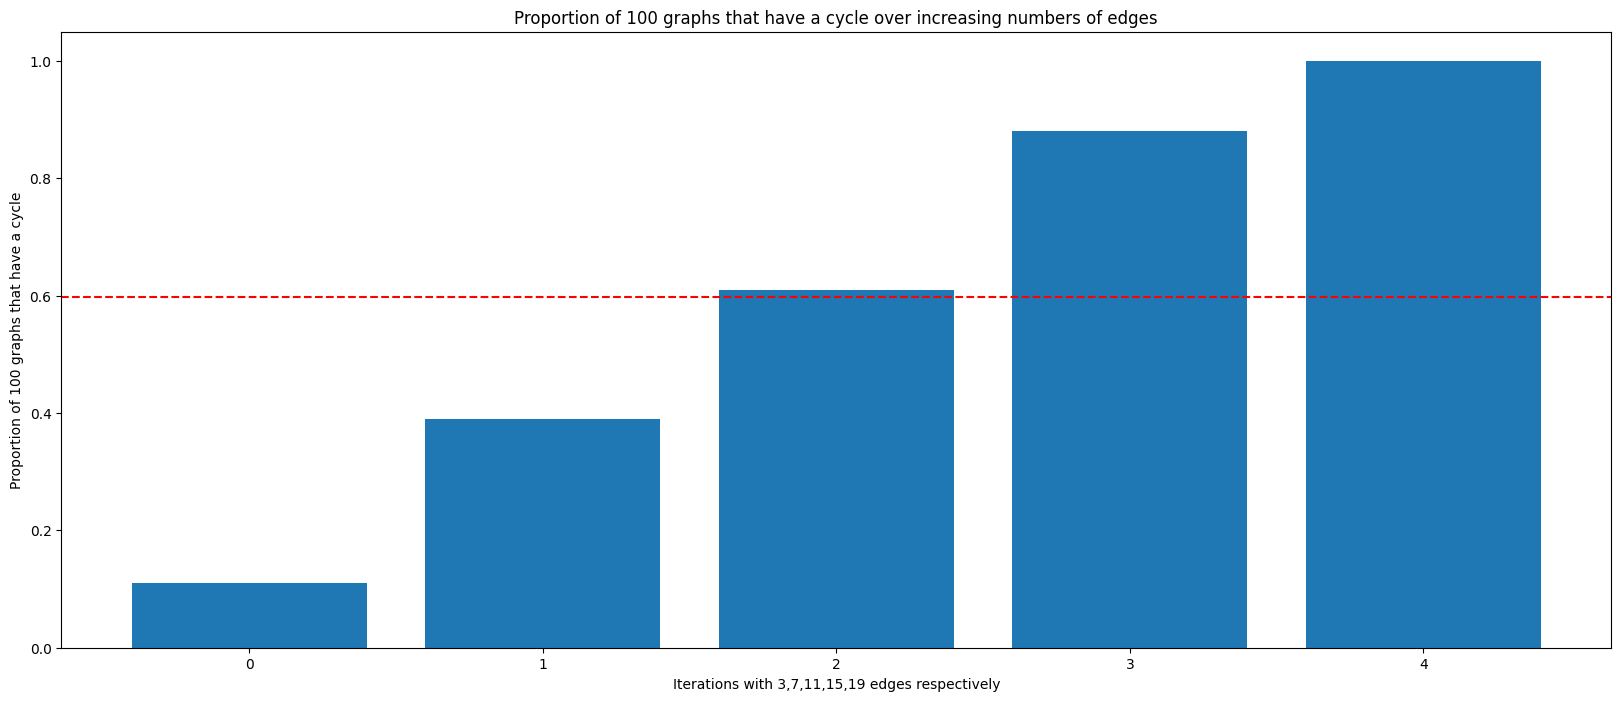

[0.11, 0.39, 0.61, 0.88, 1.0]


True

In [2766]:
def experiment_1():
    # your implementation for experiment in part 5 goes here
    edges = [3,7,11,15,19] 
    #min 3 because otherwise a cycle isn't possible
    #max 19 bc a tree (max no cycle graph) has n-1 edges, and i chose 20 nodes for this experiment
    proportions = []
    for e in edges:
        cycleNum = 0
        for _ in range(100):
            graph = create_random_graph(20,e)
            if graph.has_cycle():
                cycleNum += 1
        proportions.append(cycleNum/100)
    
    draw_plot(proportions, np.mean(proportions))
    #the mean is not particularly meaningful here because it averages the cycle proportions of graphs with different numbers of edges
    print(proportions)
    return True

experiment_1()